As we discussed in the class presynaptic action potentials trigger the <i>release of neurotransmitter</i> that binds to postsynaptic receptors. If multiple presynaptic action potentials are trigger in quick succession, in most synapses we observe that the postsynaptic responses eliceted by presynaptic spikes can be reduced in their amplitude (<b>short-term synaptic depression</b>) or increased (<b>short-term synaptic facilitation</b>). This is an effect that lasts up to tens of seconds. Here we will look at a mathematical model of short-term synaptic plasticity that captures <b>short-term depression</b>.

<br>
<figure>
    <img src='files/Figures/Synapse_STP.png' width="410" alt='Synapse with short-term synaptic plasticity (depression)' />
    <figcaption><b>Figure 1</b>: Schematic of synapse with short-term depression. The schematic represents the presynapse and neurotransmitter vesicles (blue) and the postsynapse with neurotransmitter receptors (red). Vertical blue lines represent presynaptic spikes. Red traces represent the postsynaptic voltage with excitatory postsynaptic potentials recorded from connection between pyramidal cells in the visual cortex of young mice (Costa et al. 2013). </figcaption>
</figure>


# 1. A model of short-term depression

This notebook implements a simple <b>short-term plasticity</b> model based on the model first introduced in:
<br>
Tsodyks, M., & Markram, H. (1997). The neural code between neocortical pyramidal neurons depends on neurotransmitter release probability. Proc. Natl. Acad. Sci. USA, 94(2), 719–723.
<p>

This model is defined by the following differential equations:
<br>
<center>
<font size="5">
$\begin{equation}
\frac{dR}{dt} = \frac{1-R}{\tau_D} - RU\delta_{\mathrm{spike}}
\end{equation}$
</font>
</center>

where $R$ represents the number of presynaptic vesicles, $\tau_D$ the depression timeconstant, $U$ the vesicle release probability (also called Utilization Factor) and $\delta_{\mathrm{spike}}$ represents the presynaptic spike. The postsynaptic response This can implemented as:
<br>
```python
dR = (1-R)/tau_D - U*R*spikes
R = R + dt*dR
```



# 2. Play with model

## 2.1 Change the parameters
## 2.2 Change the presynaptic frequency

# 3. Fitting the model to an experiment
Now you will try to manually fit the parameters of the model to a real experiment.

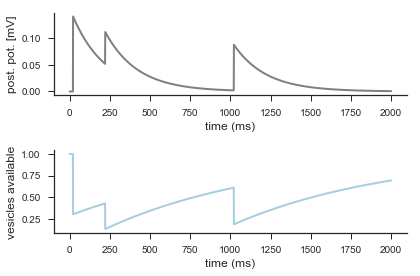

In [31]:
import code
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
plt.rc('axes', labelsize=12)
colorp = "Paired"
colors = sns.color_palette(colorp,10)
sns.set_palette(colorp,10)

# Tsodyks and Markram model of Short-term Synaptic Plasticity
# dR/dt = (1-R)/tau_D - U*R*spike(t)
# PSP = A*r*U

A = 2
U = 0.7 #Utilization factor/Release probability
tau_D = 100 #Depression timeconstant (ms)
tau_m = 20

time = 2000


R = np.ones((time,1))
Vm = np.zeros((time,1))
PSPs = np.zeros((time,1))
spikes = np.zeros((time,1))
spikes[20] = 1
spikes[220] = 1
spikes[1020] = 1
dt = 0.1


for t in range(1,time-1):
    dVm = -Vm[t]/tau_m + A*R[t]*U*spikes[t]
    Vm[t+1] = Vm[t] + dt*dVm
    
    #PSPs[t] = A*R[t]*U
    dR = (1-R[t])/tau_D - U*R[t]*spikes[t]/dt
    R[t+1] = R[t] + dt*dR
    

#print(a)


fig = plt.figure()

lw = 2
nrows = 2
ncols = 2

#A: Postsynaptic responses
ax_A = plt.subplot2grid((nrows,ncols), (0, 0), colspan=2)

linear_fun = np.arange(1,time+1)

ax_A.plot(linear_fun, Vm, label='postsynaptic responses', linewidth=lw, color='gray')
ax_A.set(xlabel='time (ms)', ylabel='post. pot. [mV]')#, xlim=(0,30), ylim=(-5,30))

#B: Presynaptic vesicles
ax_B = plt.subplot2grid((nrows,ncols), (1, 0), colspan=2)
ax_B.plot(linear_fun, R, label='pre vesicles', linewidth=lw)
ax_B.set(xlabel='time (ms)', ylabel='vesicles available')#, xlim=(0,30), ylim=(-5,30))

sns.despine()

plt.tight_layout()

#plt.savefig(loadpath + 'Figures/Figure_0_gating_v1.pdf')
plt.show()